In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/ambershen/Desktop/linARG/dx_analysis/figures/4b/data/tmp_dot_product_time_all.csv')

In [9]:
res = pd.DataFrame(columns=['chr', 'method', 'load_time', 'load_peak_memory', 'dot_product_time', 'dot_product_peak_memory'])

for method in ['grg', 'linarg', 'genotypes']:
    for chrom in [1, 11, 21]:        
        df_filt = df[(df.chr==chrom) & (df['method'].str.startswith(method))]
        
        load_time = np.sum(df_filt['load_time (s)'])
        load_peak_memory = np.sum(df_filt['load_memory (MB)'])
        dot_product_time = np.sum(df_filt['dot_product_time (s)'])
        dot_product_peak_memory = np.sum(df_filt['dot_product_memory (MB)'])
        
        res.loc[res.shape[0]] = [chrom, method, load_time, load_peak_memory, dot_product_time, dot_product_peak_memory]

In [13]:
res

,chr,method,load_time,load_peak_memory,dot_product_time,dot_product_peak_memory
0,1,grg,233.669696,35081.987500,17.056883,2.149899e+04
1,11,grg,160.091072,25564.803516,10.758467,1.522511e+04
2,21,grg,40.531252,7523.349609,3.186418,4.532375e+03
3,1,linarg,37.883671,23714.703906,6.366982,2.090814e+04
4,11,linarg,22.299925,14149.546875,3.432288,1.242435e+04
5,21,linarg,6.928738,4347.868750,0.998868,3.782043e+03
6,1,genotypes,1151.191025,925060.016016,252.991659,1.084373e+06
7,11,genotypes,733.206870,593102.444141,163.753553,6.960093e+05
8,21,genotypes,204.927594,165452.731641,46.066399,1.943936e+05


In [ ]:
for chrom in [1, 11, 21]:
    res_filt = res[res.chr==chrom]
    grg_lt = np.sum(res_filt[res_filt.method=='grg'].load_time)
    linarg_lt = np.sum(res_filt[res_filt.method=='linarg'].load_time)
    grg_dpt = np.sum(res_filt[res_filt.method=='grg'].dot_product_time)
    linarg_dpt = np.sum(res_filt[res_filt.method=='linarg'].dot_product_time)
    scipy_lt = np.sum(res_filt[res_filt.method=='genotypes'].load_time)
    scipy_dpt = np.sum(res_filt[res_filt.method=='genotypes'].dot_product_time)
    
    print(chrom)
    print(f'grg lt ratio: {grg_lt / linarg_lt}')
    print(f'scipy lt ratio: {scipy_lt / linarg_lt}')
    
    print(f'grg dpt ratio: {grg_dpt / linarg_dpt}')
    print(f'scipy dpt ratio: {scipy_dpt / linarg_dpt}')
    
    print(f'grg total ratio: {(grg_lt+grg_dpt) / (linarg_lt+linarg_dpt)}')
    print(f'scipy total ratio: {(scipy_lt+scipy_dpt) / (linarg_lt+linarg_dpt)}')
    

In [32]:
res_clean = pd.DataFrame(columns=['method', 'load_time', 'load_peak_memory', 'dot_product_time', 'dot_product_peak_memory'])

for method in ['genotypes', 'grg', 'linarg']:    
    res_clean.loc[res_clean.shape[0]] = [method] + list(res[res.method==method][['load_time', 'load_peak_memory', 'dot_product_time', 'dot_product_peak_memory']].sum(axis=0))

res_clean

,method,load_time,load_peak_memory,dot_product_time,dot_product_peak_memory
0,genotypes,2089.325489,1.683615e+06,462.811610,1.974776e+06
1,grg,434.292021,6.817014e+04,31.001768,4.125647e+04
2,linarg,67.112334,4.221212e+04,10.798138,3.711453e+04


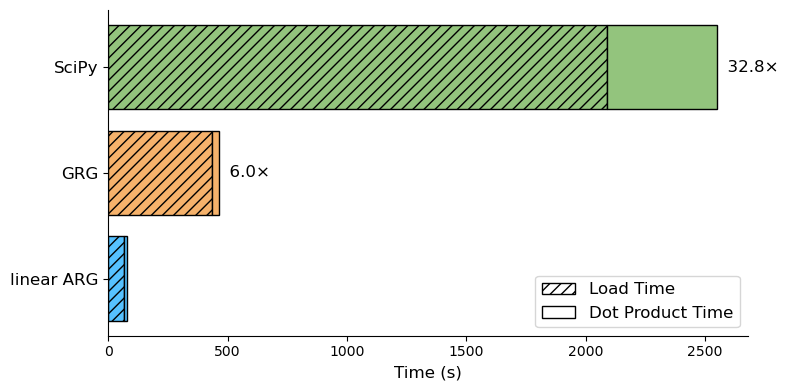

In [73]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

methods = ['scipy', 'grg', 'linarg']
load_time = res_clean.load_time
dot_product_time = res_clean.dot_product_time

y = np.arange(len(methods))

colors = ['#93c47d', '#f6b26b', '#56C1FF']

hatches = ['///', ''] 

fig, ax = plt.subplots(figsize=(8, 4))

# Plot each bar segment individually for full control
for i in range(len(methods)):
    # First subcategory
    ax.barh(y[i], load_time[i], color=colors[i], hatch=hatches[0], edgecolor='black', label='Load Time' if i == 0 else "")
    
    # Second subcategory stacked on top
    ax.barh(y[i], dot_product_time[i], 
            left=load_time[i], 
            color=colors[i], 
            hatch=hatches[1], 
            edgecolor='black', 
            label='Dot Product Time' if i == 0 else "")

# Set y-axis labels and reverse order
ax.set_yticks(y)
ax.set_yticklabels(['SciPy', 'GRG', 'linear ARG'], fontsize=12)
ax.invert_yaxis()

# Labels and title
ax.set_xlabel('Time (s)', fontsize=12)

total_time = load_time + dot_product_time
linarg_time = total_time[2]
for i in [0, 1]:  # Only for scipy and grg
    speedup = total_time[i] / linarg_time
    ax.text(total_time[i] + 0.05, y[i], f"  {speedup:.1f}×", va='center', fontsize=12)

legend_handles = [
    mpatches.Patch(facecolor='white', edgecolor='black', hatch=hatches[0], label='Load Time'),
    mpatches.Patch(facecolor='white', edgecolor='black', label='Dot Product Time')
]
ax.legend(handles=legend_handles, fontsize=12)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.show()
